In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [110]:
df_gpu = pd.read_csv('web_scrape_data\web_scrape_gpu.csv')
df_cpu = pd.read_csv('web_scrape_data\web_scrape_cpu.csv')
df_mobo = pd.read_csv('web_scrape_data\web_scrape_mobo.csv')
df_ram = pd.read_csv('web_scrape_data\web_scrape_ram.csv')
df_ssd = pd.read_csv('web_scrape_data\web_scrape_ssd.csv')
df_psu = pd.read_csv('web_scrape_data\web_scrape_psu.csv')
df_case = pd.read_csv('web_scrape_data\web_scrape_case.csv')
df_fan = pd.read_csv('web_scrape_data\web_scrape_fan.csv')

In [111]:
df_gpu.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_cpu.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_mobo.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_ram.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_ssd.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_psu.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_case.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_cpufan.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [112]:
df_gpu['Type'] = 'Graphics card'
df_cpu['Type'] = 'Processor'
df_mobo['Type'] = 'Motherboard'
df_ram['Type'] = 'Memory'
df_ssd['Type'] = 'Solid State Drive'
df_psu['Type'] = 'Power supply'
df_case['Type'] = 'Case'
df_fan['Type'] = 'CPU/GPU fan'

In [113]:
df = pd.concat([df_gpu, df_cpu, df_mobo, df_ram, df_ssd, df_psu, df_case, df_fan])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5024 entries, 0 to 264
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        5022 non-null   object
 1   Product      5024 non-null   object
 2   Price        5024 non-null   object
 3   Description  3247 non-null   object
 4   Url          5024 non-null   object
 5   Type         5024 non-null   object
dtypes: object(6)
memory usage: 274.8+ KB


In [115]:
df.isna().sum()

Brand             2
Product           0
Price             0
Description    1777
Url               0
Type              0
dtype: int64

In [116]:
df.head()

,Brand,Product,Price,Description,Url,Type
0,Asus,GeForce RTX 3080 TUF Gaming - OC Edition -näy...,"859,90","PCIe 4.0, 2xHDMI/3xDP - IO-Tech.fi Toimituksen...",jimms.fi/fi/Product/Show/164677/tuf-rtx3080-o1...,Graphics card
1,Gigabyte,"GeForce RTX 2060 D6 -näytönohjain, 6GB GDDR6 ...","309,00","PCI-E 3.0, HDMI/3xDP ...",jimms.fi/fi/Product/Show/162815/gv-n2060d6-6gd...,Graphics card
2,Asus,"GeForce RTX 3080 TUF Gaming -näytönohjain, 10...","829,90","PCIe 4.0, 2xHDMI/3xDP ...",jimms.fi/fi/Product/Show/164678/tuf-rtx3080-10...,Graphics card
3,MSI,"GeForce RTX 3080 GAMING X TRIO -näytönohjain,...","849,90","PCIe 4.0, HDMI/3xDP ...",jimms.fi/fi/Product/Show/164683/rtx-3080-gamin...,Graphics card
4,Asus,GeForce RTX 3080 ROG Strix - OC Edition -näyt...,"949,90","PCIe 4.0, 2xHDMI/3xDP ...",jimms.fi/fi/Product/Show/164725/rog-strix-rtx3...,Graphics card


In [117]:
df.Price = df.Price.str.replace(',', '.')
df.Price = df.Price.str.replace(' ', '')
df.Price = df.Price.str.replace(u'\u00A0', '')

In [118]:
df.Price = pd.to_numeric(df.Price)

In [119]:
df.Price.dtypes

dtype('float64')

In [120]:
df.to_csv('jimms_product_data.csv', encoding='utf-8', index=False)

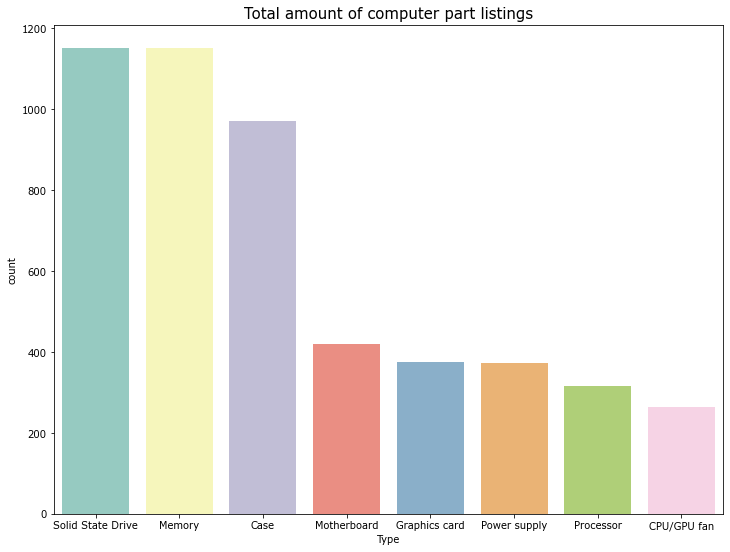

In [121]:
sns.set_palette('Set3')
plt.rcParams['font.family'] = 'Verdana'

plt.figure(figsize=(12,9))
order=df['Type'].value_counts().index
sns.countplot(data=df,x='Type', order=order)
plt.title('Total amount of computer part listings', fontsize=15)
plt.show()

In [123]:
df.sort_values(by='Price', ascending=False,).head(20)

,Brand,Product,Price,Description,Url,Type
138,PNY,"Tesla V100S -näytönohjain ammattikäyttöön, 32...",16705.0,"PCIe 3.0, ei näyttöliitäntöjä ...",jimms.fi/fi/Product/Show/164993/tcsv100sm-32gb...,Graphics card
42,Intel,"Xeon Platinum 8180, LGA3647, 2.50 GHz, 38.5 M...",11068.0,NaN,jimms.fi/fi/Product/Show/154665/bx806738180/in...,Processor
71,Intel,"Xeon E7-8894 v4, LGA2011-v3, 2.4GHz, 60MB, Tray",9833.0,NaN,jimms.fi/fi/Product/Show/130287/cm806690325180...,Processor
138,Intel,"Xeon Platinum 8176, LGA3647, 2.10 GHz, 38.5 M...",9643.0,NaN,jimms.fi/fi/Product/Show/154666/bx806738176/in...,Processor
192,PNY,Quadro GP100 -näytönohjain ammattilaiskäyttöö...,8499.0,"PCI-E 3.0, DVI/4xDP ...",jimms.fi/fi/Product/Show/128926/vcqgp100-pb/pn...,Graphics card
173,Intel,"Xeon Platinum 8170, LGA3647, 2.10 GHz, 35.75 ...",8191.0,NaN,jimms.fi/fi/Product/Show/154667/bx806738170/in...,Processor
176,Intel,"Xeon E7-8890 v4, LGA2011-v3, 2.2GHz, 60MB, Tray",7928.0,NaN,jimms.fi/fi/Product/Show/130284/cm806690288520...,Processor
148,Intel,"Xeon Platinum 8256, LGA3647, 3.80 GHz, 16.5 M...",7751.0,NaN,jimms.fi/fi/Product/Show/154699/bx806958256/in...,Processor
275,Intel,"Xeon E7-8891 v4, LGA2011-v3, 2.8GHz, 60MB, Tray",7560.0,NaN,jimms.fi/fi/Product/Show/130285/cm806690202790...,Processor
223,Intel,"Xeon E7-8893 v4, LGA2011-v3, 3.2GHz, 60MB, Tray",7560.0,NaN,jimms.fi/fi/Product/Show/130286/cm806690206550...,Processor


In [128]:
sns.histplot(df, x='Price', kind='kde', bw_adjust=0.25)

AttributeError: module 'seaborn' has no attribute 'histplot'